**Regression**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


class LinearRegression:
    def fit(self, x, y):
        transposed = np.transpose(x)
        self.w = np.dot(np.dot(np.linalg.inv(np.dot(transposed, x)), transposed), y)

    def predict(self, values):
        return np.dot(values, self.w)


def r2score(y_true, y_pred):
    mean = y_true.mean()
    t = y_true.copy()
    for i in range(len(t)):
        t[i] -= mean
    return 1 - (np.sum((y_true - y_pred) ** 2)) / (np.sum(t ** 2))


def plot_prediction(x, y, y_pred):
    plt.scatter(x, y,  color='k')
    sorted_args = np.argsort(x, axis=0)
    plt.plot(x[sorted_args].reshape(x.shape), y_pred[sorted_args].reshape(y_pred.shape), color='r')

    plt.show()


def process_dataset(filename):
    dataset = pd.read_csv(filename)
    x = dataset.drop('y', axis=1).to_numpy()
    y = dataset['y'].to_numpy()
    training_x, test_x, training_y, test_y = train_test_split(x, y, test_size=0.2)

    linear_regression = LinearRegression()
    linear_regression.fit(training_x, training_y)
    y_pred = linear_regression.predict(test_x)
    print(r2score(test_y, y_pred))
    return x, y, linear_regression


-0.11221705906436164


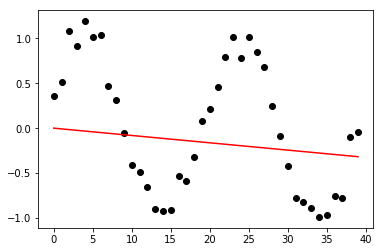

In [3]:
x, y, regressor = process_dataset('noisysine.csv')    
plot_prediction(x, y, regressor.predict(x))

In [4]:
_, _, _ = process_dataset('hydrodynamics.csv')

0.6748344221043872


In [5]:
from sklearn.preprocessing import PolynomialFeatures

def process_dataset(filename, degree=1):
    features = PolynomialFeatures(degree)

    dataset = pd.read_csv(filename)
    x = dataset.drop('y', axis=1).to_numpy()
    y = dataset['y'].to_numpy()
    training_x, test_x, training_y, test_y = train_test_split(x, y, test_size=0.2)

    linear_regression = LinearRegression()
    linear_regression.fit(features.fit_transform(training_x), training_y)
    y_pred = linear_regression.predict(features.fit_transform(test_x))
    print(r2score(test_y, y_pred))    
    return x, y, linear_regression, features.fit_transform(x)

0.12102712620893985


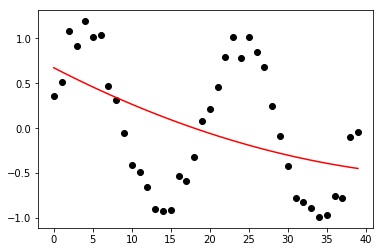

In [7]:
x, y, regressor, transformed_x = process_dataset('noisysine.csv', 2)
plot_prediction(x, y, regressor.predict(transformed_x))

0.1775181449463341


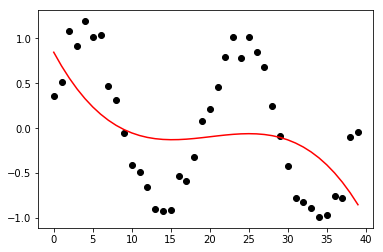

In [11]:
x, y, regressor, transformed_x = process_dataset('noisysine.csv', 3)
plot_prediction(x, y, regressor.predict(transformed_x))

0.3846041864084899


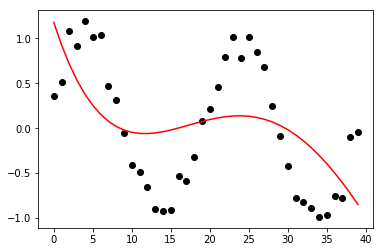

In [16]:
x, y, regressor, transformed_x = process_dataset('noisysine.csv', 4)
plot_prediction(x, y, regressor.predict(transformed_x))

0.801715809140385


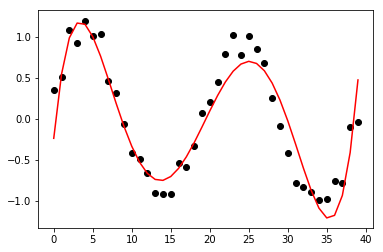

In [17]:
x, y, regressor, transformed_x = process_dataset('noisysine.csv', 5)
plot_prediction(x, y, regressor.predict(transformed_x))

In [20]:
_, _, _, _ = process_dataset('hydrodynamics.csv', 2)

0.9151341832682037


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


class RidgeRegression:
    def fit(self, x, y, lam):
        transposed = np.transpose(x)
        lambda_identity = lam * np.identity(len(transposed))
        inverse = np.linalg.inv(np.dot(transposed, x) + lambda_identity)
        self.w = np.dot(np.dot(inverse, transposed), y)

    def predict(self, values):
        return np.dot(values, self.w)


def r2score(y_true, y_pred):
    mean = y_true.mean()
    t = y_true.copy()
    for i in range(len(t)):
        t[i] -= mean
    return 1 - (np.sum((y_true - y_pred) ** 2)) / (np.sum(t ** 2))


def plot_prediction(x, y, y_pred):
    plt.scatter(x, y, color='k')
    sorted_args = np.argsort(x, axis=0)
    plt.plot(x[sorted_args].reshape(x.shape), y_pred[sorted_args].reshape(y_pred.shape), color='r')

    plt.show()


def ridge_regression_optimize(training_x, test_x, training_y, test_y):
    iterations = 11
    parameters = [0.1 ** p for p in range(iterations)]
    r2_scores = [0] * iterations
    y_predictions = [[]] * iterations
    regressors = [None] * iterations
    for i in range(iterations):
        lam = parameters[i]
        regressor = RidgeRegression()
        regressor.fit(training_x, training_y, lam)
        y_pred = regressor.predict(test_x)
        y_predictions[i] = y_pred
        r2_scores[i] = r2score(test_y, y_pred)
        regressors[i] = regressor
    best_index = np.argmax(r2_scores)
    print("Best parameter value: " + str(parameters[best_index]))
    print("R2 score: " + str(r2_scores[best_index]))
    return regressors[best_index]


def process_dataset(filename, degree=1):
    features = PolynomialFeatures(degree)

    dataset = pd.read_csv(filename)
    x = dataset.drop('y', axis=1).to_numpy()
    y = dataset['y'].to_numpy()
    training_x, test_x, training_y, test_y = train_test_split(x, y, test_size=0.2)

    transformed_training_x = features.fit_transform(training_x)
    transformed_test_x = features.fit_transform(test_x)

    regressor = ridge_regression_optimize(transformed_training_x, transformed_test_x, training_y, test_y)
    return x, y, regressor, features.fit_transform(x)


Best parameter value: 1.0000000000000006e-10
R2 score: 0.2909844246127252


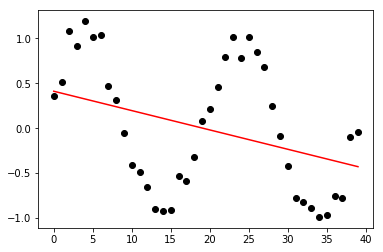

In [23]:
x, y, regressor, transformed_x = process_dataset('noisysine.csv', 1)
plot_prediction(x, y, regressor.predict(transformed_x))

Best parameter value: 1.0000000000000006e-10
R2 score: 0.23902490039854707


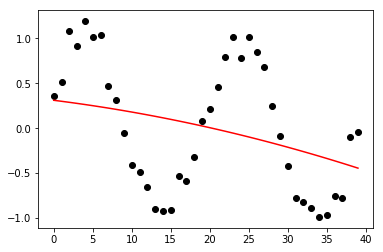

In [26]:
x, y, regressor, transformed_x = process_dataset('noisysine.csv', 2)
plot_prediction(x, y, regressor.predict(transformed_x))

Best parameter value: 1.0000000000000006e-10
R2 score: 0.26892636630758804


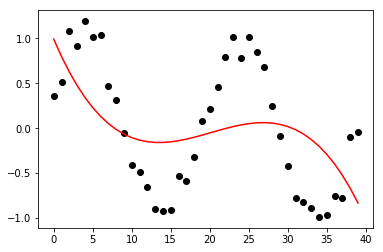

In [29]:
x, y, regressor, transformed_x = process_dataset('noisysine.csv', 3)
plot_prediction(x, y, regressor.predict(transformed_x))

Best parameter value: 1.0000000000000006e-10
R2 score: 0.4711503648097022


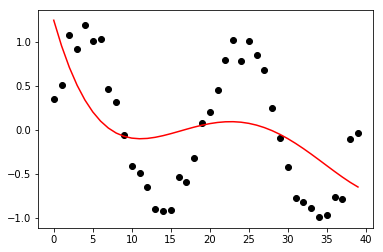

In [30]:
x, y, regressor, transformed_x = process_dataset('noisysine.csv', 4)
plot_prediction(x, y, regressor.predict(transformed_x))

Best parameter value: 0.1
R2 score: 0.9547593684810833


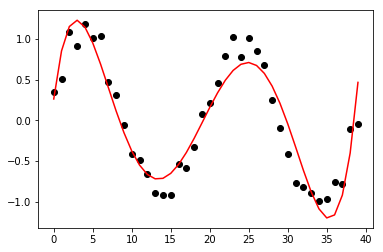

In [31]:
x, y, regressor, transformed_x = process_dataset('noisysine.csv', 5)
plot_prediction(x, y, regressor.predict(transformed_x))

In [32]:
_, _, _, _ = process_dataset('hydrodynamics.csv', 1)

Best parameter value: 1.0000000000000006e-10
R2 score: 0.6427898303430226


In [33]:
_, _, _, _ = process_dataset('hydrodynamics.csv', 2)

Best parameter value: 0.0010000000000000002
R2 score: 0.9266184516811931


In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso


def r2score(y_true, y_pred):
    mean = y_true.mean()
    t = y_true.copy()
    for i in range(len(t)):
        t[i] -= mean
    return 1 - (np.sum((y_true - y_pred) ** 2)) / (np.sum(t ** 2))


def plot_prediction(x, y, y_pred):
    plt.scatter(x, y, color='k')
    sorted_args = np.argsort(x, axis=0)
    plt.plot(x[sorted_args].reshape(x.shape), y_pred[sorted_args].reshape(y_pred.shape), color='r')

    plt.show()


def lasso_regression_optimize(training_x, test_x, training_y, test_y):
    iterations = 11
    parameters = [0.1 ** p for p in range(iterations)]
    r2_scores = [0] * iterations
    y_predictions = [[]] * iterations
    regressors = [None] * iterations
    for i in range(iterations):
        regressor = Lasso(alpha=parameters[i], max_iter=30000)
        regressor.fit(training_x, training_y)
        y_pred = regressor.predict(test_x)
        r2_scores[i] = r2score(test_y, y_pred)
        y_predictions[i] = y_pred
        regressors[i] = regressor
    best_index = np.argmax(r2_scores)
    features_number = (regressors[best_index].coef_ != 0).sum()
    print("Best parameter value: " + str(parameters[best_index]))
    print("R2 score: " + str(r2_scores[best_index]))
    print("Number of used features: " + str(features_number))
    return regressors[best_index]


def process_dataset(filename, degree=1):
    features = PolynomialFeatures(degree)

    dataset = pd.read_csv(filename)
    x = dataset.drop('y', axis=1).to_numpy()
    y = dataset['y'].to_numpy()
    training_x, test_x, training_y, test_y = train_test_split(x, y, test_size=0.2)

    transformed_training_x = features.fit_transform(training_x)
    transformed_test_x = features.fit_transform(test_x)

    regressor = lasso_regression_optimize(transformed_training_x, transformed_test_x, training_y, test_y)
    return x, y, regressor, features.fit_transform(x)


Best parameter value: 1.0000000000000006e-10
R2 score: 0.28570064740369217
Number of used features: 1


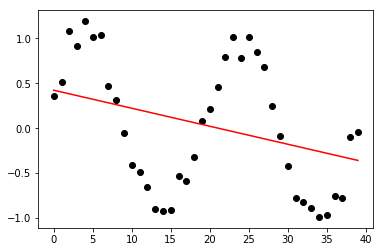

In [38]:
x, y, regressor, transformed_x = process_dataset('noisysine.csv', 1)
plot_prediction(x, y, regressor.predict(transformed_x))

Best parameter value: 0.1
R2 score: 0.26969970423211653
Number of used features: 2


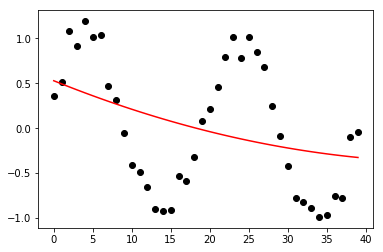

In [40]:
x, y, regressor, transformed_x = process_dataset('noisysine.csv', 2)
plot_prediction(x, y, regressor.predict(transformed_x))

Best parameter value: 0.010000000000000002
R2 score: 0.5160694344181707
Number of used features: 3


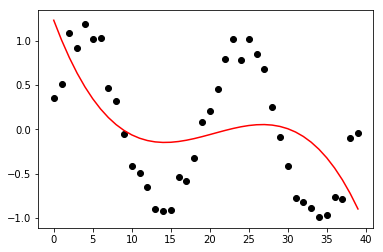

In [91]:
x, y, regressor, transformed_x = process_dataset('noisysine.csv', 3)
plot_prediction(x, y, regressor.predict(transformed_x))

/home/darya/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/darya/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/darya/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/darya/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not co

Best parameter value: 0.010000000000000002
R2 score: 0.29692159531065365
Number of used features: 4


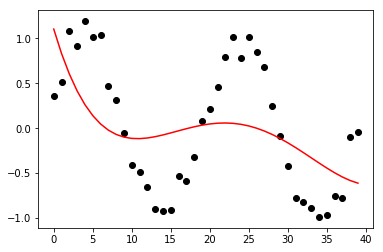

In [87]:
x, y, regressor, transformed_x = process_dataset('noisysine.csv', 4)
plot_prediction(x, y, regressor.predict(transformed_x))

/home/darya/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/darya/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/darya/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/darya/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not co

Best parameter value: 1.0000000000000006e-10
R2 score: 0.5032776166119272
Number of used features: 5


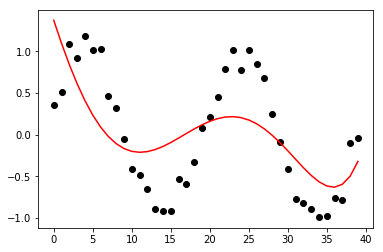

In [84]:
x, y, regressor, transformed_x = process_dataset('noisysine.csv', 5)
plot_prediction(x, y, regressor.predict(transformed_x))

In [79]:
_, _, _, _ = process_dataset('hydrodynamics.csv', 1)

Best parameter value: 1.0000000000000006e-10
R2 score: 0.6754866089192993
Number of used features: 6


/home/darya/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/darya/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/darya/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [80]:
_, _, _, _ = process_dataset('hydrodynamics.csv', 2)

Best parameter value: 0.00010000000000000002
R2 score: 0.8974100822603699
Number of used features: 25


/home/darya/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/darya/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/darya/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/darya/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not co

**Global and local search**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math


def get_distance(x, y, path):
    dist_x = [0] * (len(x) - 1)
    dist_y = [0] * (len(x) - 1)
    for i in range(1, len(x)):
        dist_x[i - 1] = abs(x[path][i] - x[path][i - 1])
        dist_y[i - 1] = abs(y[path][i] - y[path][i - 1])
    return np.asarray(dist_x).sum() + np.asarray(dist_y).sum()


def output_path(x, y, path):
    path_x = [x[path][0]]
    path_y = [y[path][0]]
    path_points = [a for a in zip(x[path], y[path])]
    path_points.pop(0)
    for i in range(len(path_points)):
        path_x.append(path_x[-1])
        path_y.append(path_points[i][1])
        path_x.append(path_points[i][0])
        path_y.append(path_points[i][1])

    plt.scatter(x, y, color='black')
    plt.plot(path_x, path_y)
    plt.show()


def process_dataset(search_function):
    dataset = pd.read_csv('tsp.csv')
    x = dataset.iloc[:, 1].to_numpy()
    y = dataset.iloc[:, -1].to_numpy()

    order, best_distance = search_function(x, y)
    print("Best distance: " + str(best_distance))
    output_path(x, y, order)


*Monte-Carlo Search*

In [51]:
def monte_carlo_search(x, y, iterations=100000):
    best_path = np.empty(len(x))
    best_distance = math.inf
    for i in range(iterations):
        path = np.arange(len(x))
        np.random.shuffle(path)
        distance = get_distance(x, y, path)
        if distance < best_distance:
            best_distance = distance
            best_path = path
    return best_path, best_distance

Best distance: 26590


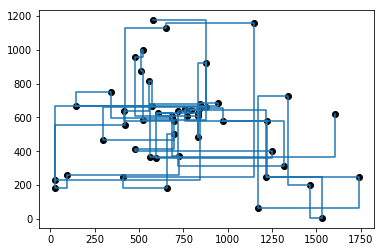

In [52]:
 process_dataset(monte_carlo_search)

*Random Walk Search*

In [53]:
def random_walk_search(x, y):
    path = []
    not_visited = [i for i in range(len(x))]
    for i in reversed(range(len(x))):
        index = int(np.random.uniform(0, i + 1))
        path.append(not_visited[index])
        not_visited.pop(index)
    return path, get_distance(x, y, path)

Best distance: 36885


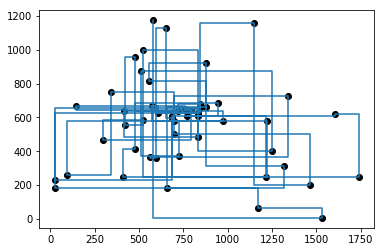

In [55]:
 process_dataset(random_walk_search)

*Hill Climb*

In [4]:
def swap_all_with_index(x, index):
    swapped = []
    for i in range(len(x) - 1):
        if i != index:
            x_swapped = x.copy()
            x_swapped[[i, index]] = x_swapped[[index, i]]
            swapped.append(x_swapped)
    return swapped


def hill_climb(x, y, iterations=10000):
    path = np.arange(len(x))
    np.random.shuffle(path)
    best_distance = get_distance(x, y, path)
    for i in range(iterations):
        prev_distance = best_distance
        swap_index = i % len(x)
        for p in swap_all_with_index(path, swap_index):
            distance = get_distance(x, y, p)
            if distance < best_distance:
                path = p
                best_distance = distance

        if prev_distance == best_distance:
            break

    return path, best_distance

Best distance: 19645


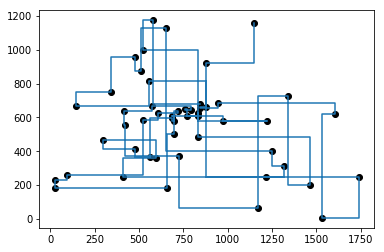

In [67]:
process_dataset(hill_climb)

*Simulated Annealing*

In [7]:
from scipy.special import softmax

def simulated_annealing(x, y, iterations=10000, t_max=1000, t_min=0.001):
    path = np.arange(len(x))
    np.random.shuffle(path)
    best_distance = get_distance(x, y, path)

    for i in range(iterations):
        swap_index = i % len(x)
        variants = np.array(swap_all_with_index(path, swap_index))
        distances = [get_distance(x, y, p) for p in variants]
        distances_diff = np.asarray(best_distance - distances)
        temperature = t_max - (t_max - t_min) * i / iterations
        probabilities = softmax(distances_diff / temperature)
        path = variants[np.random.choice(len(variants), p=probabilities)]
        best_distance = get_distance(x, y, path)

    return path, best_distance

Best distance: 12260


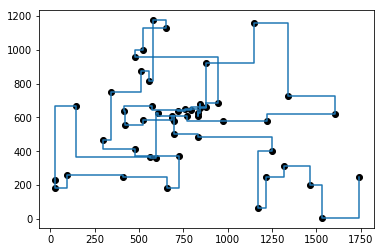

In [8]:
process_dataset(simulated_annealing)

*Genetic Algorithm*

In [12]:
def create_path(x):
    path = np.arange(len(x))
    np.random.shuffle(path)
    return path


def initial_population(x, population_size):
    population = []
    for i in range(population_size):
        population.append(create_path(x))
    return population


def breed(first_parent, second_parent):
    split_index = int(random.random() * len(first_parent))
    not_in_first = [i for i in second_parent if i not in first_parent[:split_index]]
    not_in_second = [i for i in first_parent if i not in second_parent[:split_index]]
    first = first_parent[:split_index]
    second = second_parent[:split_index]
    for i in range(len(first_parent) - split_index):
        first = np.append(first, not_in_first[i])
        second = np.append(second, not_in_second[i])
    return first, second


def mutate(individual, mutation_rate=0.05):
    for swapped in range(len(individual)):
        if random.random() < mutation_rate:
            swap_with = int(random.random() * len(individual))

            first = individual[swapped]
            second = individual[swap_with]

            individual[swapped] = second
            individual[swap_with] = first
    return individual


def genetic_algorithm(x, y, population_size=100, generations=5000):
    population = initial_population(x, population_size)
    distances = [get_distance(x, y, path) for path in population]
    for i in range(generations):
        indices = np.argsort(np.asarray(distances))
        first_parent = population[indices[0]]
        second_parent = population[indices[1]]
        first, second = breed(first_parent, second_parent)
        population[indices[-1]] = mutate(first)
        population[indices[-2]] = mutate(second)
        distances[indices[-1]] = get_distance(x, y, population[indices[-1]])
        distances[indices[-2]] = get_distance(x, y, population[indices[-2]])
    best_index = np.argsort(np.asarray(distances))[0]
    return population[best_index], get_distance(x, y, population[best_index])

Best distance: 13400


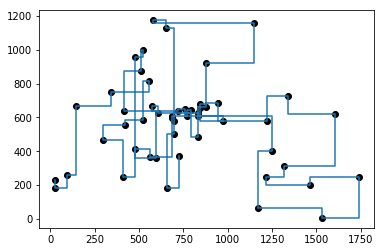

In [13]:
process_dataset(genetic_algorithm)